In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm

from uco.data_loader import pivot_df, RLEOutput

In [61]:
H = RLEOutput.MASK_H
W = RLEOutput.MASK_W
HxW = H * W

In [12]:
submission_dir = Path('../data/submissions')
sub_filenames = list(submission_dir.glob('*.csv'))
print(len(sub_filenames))

21


In [30]:
subs = {}
for f in sub_filenames:
    score = f.stem
    df = pd.read_csv(f)
    subs[score] = pivot_df(df)

In [15]:
subs['6750'].head()

,rle0,rle1,rle2,rle3,n_classes,c0,c1,c2,c3
Image,,,,,,,,,
002f507.jpg,NaN,NaN,1 349 351 349 701 54949 55651 349 56001 349 56...,NaN,1,False,False,True,False
0035ae9.jpg,NaN,NaN,59 282 405 290 753 293 1103 294 1453 294 1803 ...,974 5 1002 14 1318 16 1349 22 1663 26 1692 33 ...,2,False,False,True,True
0038327.jpg,NaN,NaN,NaN,193 145 532 161 879 165 1228 167 1577 168 1926...,1,False,False,False,True
004f759.jpg,NaN,78196 15 78539 31 78883 45 79223 59 79569 68 7...,NaN,6 144 353 150 703 152 1052 154 1402 156 1752 1...,2,False,True,False,True
005ba08.jpg,NaN,NaN,4314 12 4663 16 5014 16 5364 16 5715 15 6064 1...,NaN,1,False,False,True,False


In [41]:
def get_weight(score):
    score = (int(score) - 6680) ** 1.3
    return score

In [42]:
weighted_predictions = []
weights = []
for score, df in subs.items():
    weight = get_weight(score)
    weighted_predictions.append(df[['c0', 'c1', 'c2', 'c3']] * weight)
    weights.append(weight)
print(weights)

[52.34619071934546, 278.64911622299184, 200.49687830562965, 101.69239077354787, 250.39603756108315, 222.86094420380783, 264.4354757420232, 165.89803000646933, 113.16670619733615, 49.129121044631624, 170.13918445425972, 250.39603756108315, 52.34619071934546, 191.70670925956188, 183.00859899884796, 174.40487910756713, 174.40487910756713, 128.89144052801933, 55.60956336124427, 174.40487910756713, 259.73605822578133]


In [99]:
df = weighted_predictions[0]
for each in weighted_predictions[1:]:
    df = df + each
df = df / sum(weights)
df.head(60)

,c0,c1,c2,c3
Image,,,,
002f507.jpg,0.000000,0.000000,1.000000,0.000000
0035ae9.jpg,0.000000,0.000000,1.000000,1.000000
0038327.jpg,0.000000,0.000000,0.000000,1.000000
004f759.jpg,0.000000,1.000000,0.000000,1.000000
005ba08.jpg,0.000000,0.000000,1.000000,0.000000
006440a.jpg,0.945447,0.000000,1.000000,1.000000
006f61b.jpg,0.000000,1.000000,0.000000,0.465602
0078e5a.jpg,1.000000,0.000000,0.000000,0.000000
008fc8a.jpg,0.000000,1.000000,0.000000,0.000000


In [100]:
th = 0.65
df_th = df > th
df_th.head()

,c0,c1,c2,c3
Image,,,,
002f507.jpg,False,False,True,False
0035ae9.jpg,False,False,True,True
0038327.jpg,False,False,False,True
004f759.jpg,False,True,False,True
005ba08.jpg,False,False,True,False


In [101]:
print(df_th.sum(axis=0))
df_th.to_csv('../data/original/selected.csv')

c0    1207
c1    1346
c2    1191
c3    2021
dtype: int64


In [52]:
def pixel_count(s):
    if not isinstance(s, str):
        return 0
    mask = RLEOutput.from_str(s).to_mask()
    return mask.sum()

In [56]:
for _, df in tqdm(subs.items()):
    df['px0'] = df.iloc[:, 0].apply(pixel_count)
    df['px1'] = df.iloc[:, 1].apply(pixel_count)
    df['px2'] = df.iloc[:, 2].apply(pixel_count)
    df['px3'] = df.iloc[:, 3].apply(pixel_count)

100%|██████████| 21/21 [05:57<00:00, 17.04s/it]


In [134]:
weighted_pixel_counts = []
weights = []
for score, df in subs.items():
    weight = get_weight(score)
    df_sel = df[['px0', 'px1', 'px2', 'px3']]
    weighted_pixel_counts.append(df_sel[df_sel > 0] * weight)
    weights.append(weight)
print(weights)

[52.34619071934546, 278.64911622299184, 200.49687830562965, 101.69239077354787, 250.39603756108315, 222.86094420380783, 264.4354757420232, 165.89803000646933, 113.16670619733615, 49.129121044631624, 170.13918445425972, 250.39603756108315, 52.34619071934546, 191.70670925956188, 183.00859899884796, 174.40487910756713, 174.40487910756713, 128.89144052801933, 55.60956336124427, 174.40487910756713, 259.73605822578133]


In [135]:
df = weighted_pixel_counts[0]
for each in weighted_pixel_counts[1:]:
    df = df + each
df = df / sum(weights)
df = df / HxW
df.head(10)

,px0,px1,px2,px3
Image,,,,
002f507.jpg,NaN,NaN,0.805025,NaN
0035ae9.jpg,NaN,NaN,0.478493,0.305647
0038327.jpg,NaN,NaN,NaN,0.247586
004f759.jpg,NaN,0.494378,NaN,0.172322
005ba08.jpg,NaN,NaN,0.528236,NaN
006440a.jpg,NaN,NaN,0.166607,0.445945
006f61b.jpg,NaN,0.438870,NaN,NaN
0078e5a.jpg,0.356107,NaN,NaN,NaN
008fc8a.jpg,NaN,0.146621,NaN,NaN


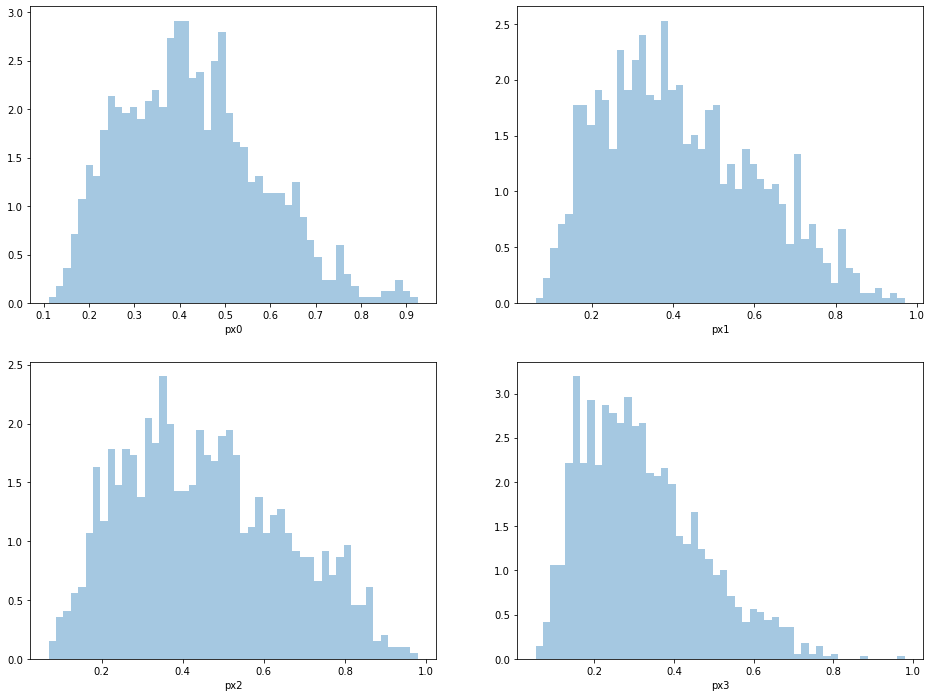

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.distplot(df.loc[pd.notnull(df.px0), 'px0'], bins=50, kde=False, norm_hist=True, ax=axs[0, 0])
sns.distplot(df.loc[pd.notnull(df.px1), 'px1'], bins=50, kde=False, norm_hist=True, ax=axs[0, 1])
sns.distplot(df.loc[pd.notnull(df.px2), 'px2'], bins=50, kde=False, norm_hist=True, ax=axs[1, 0])
sns.distplot(df.loc[pd.notnull(df.px3), 'px3'], bins=50, kde=False, norm_hist=True, ax=axs[1, 1])
plt.show()

In [137]:
df = pd.read_csv('../data/original/submission.csv')
df = pivot_df(df)
df['px0'] = df.iloc[:, 0].apply(pixel_count) / HxW
df['px1'] = df.iloc[:, 1].apply(pixel_count) / HxW
df['px2'] = df.iloc[:, 2].apply(pixel_count) / HxW
df['px3'] = df.iloc[:, 3].apply(pixel_count) / HxW

In [138]:
df[df == 0] = np.nan
df.head()

,rle0,rle1,rle2,rle3,n_classes,c0,c1,c2,c3,px0,px1,px2,px3
Image,,,,,,,,,,,,,
002f507.jpg,NaN,NaN,1 53199 53201 348 53551 347 53901 347 54251 34...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,0.796582,NaN
0035ae9.jpg,NaN,NaN,54 293 404 294 753 296 1103 296 1453 297 1802 ...,1324 12 1665 56 2011 66 2357 73 2703 79 3050 8...,2.0,NaN,NaN,1.0,1.0,NaN,NaN,0.478063,0.313595
0038327.jpg,NaN,NaN,NaN,189 156 536 160 884 163 1232 166 1580 169 1929...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.237410
004f759.jpg,NaN,74684 18 75024 40 75368 53 75714 63 76061 71 7...,NaN,1 152 351 154 701 155 1051 157 1401 159 1751 1...,2.0,NaN,1.0,NaN,1.0,NaN,0.53686,NaN,0.196713
005ba08.jpg,NaN,NaN,42104 8 42452 13 42800 17 43148 21 43496 25 43...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,0.473551,NaN


In [139]:
for q in [0.10, 0.50, 0.90]:
    print(df.loc[pd.notnull(df.px0), 'px0'].quantile(q))
print('\n')
for q in [0.10, 0.50, 0.90]:
    print(df.loc[pd.notnull(df.px1), 'px1'].quantile(q))
print('\n')
for q in [0.10, 0.50, 0.90]:
    print(df.loc[pd.notnull(df.px2), 'px2'].quantile(q))
print('\n')
for q in [0.10, 0.50, 0.90]:
    print(df.loc[pd.notnull(df.px3), 'px3'].quantile(q))

0.23430639455782315
0.4085496598639456
0.6067885714285717


0.18297034013605443
0.3825034013605442
0.6817850340136056


0.1853273469387755
0.4044789115646259
0.7038133333333332


0.14030585034013607
0.2867047619047619
0.5090666666666667


In [ ]:
0.23581799692268768
0.41339926179976016
0.6374495801273283


0.18605175894456333
0.3906220691963796
0.6915882762253303


0.20955995409689973
0.4411632682430221
0.7481466710657496


0.14841839822344638
0.2967858219807814
0.5260884699598067

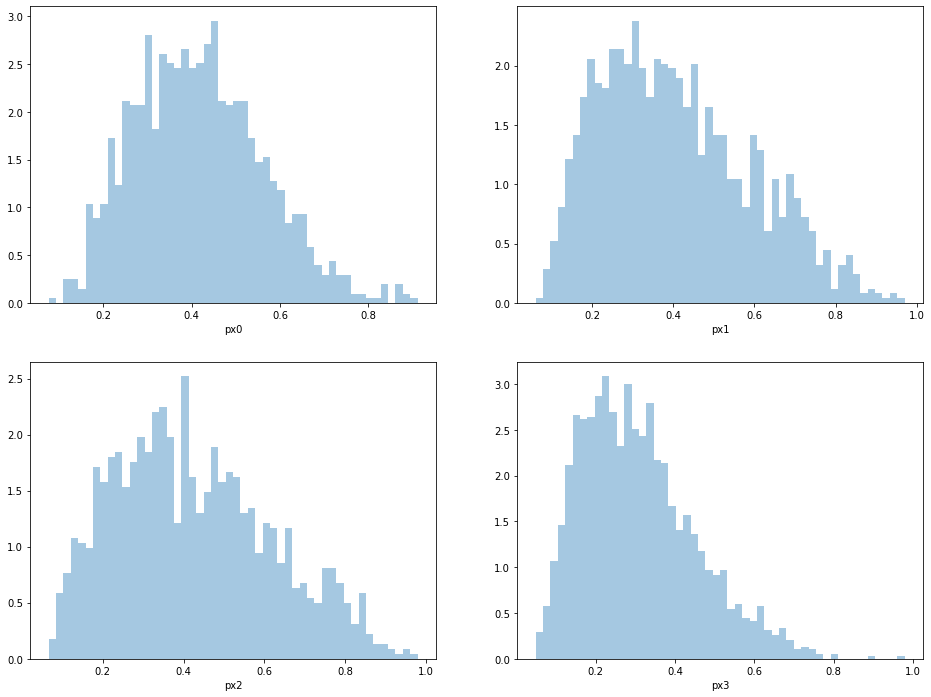

In [133]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.distplot(df.loc[pd.notnull(df.px0), 'px0'], bins=50, kde=False, norm_hist=True, ax=axs[0, 0])
sns.distplot(df.loc[pd.notnull(df.px1), 'px1'], bins=50, kde=False, norm_hist=True, ax=axs[0, 1])
sns.distplot(df.loc[pd.notnull(df.px2), 'px2'], bins=50, kde=False, norm_hist=True, ax=axs[1, 0])
sns.distplot(df.loc[pd.notnull(df.px3), 'px3'], bins=50, kde=False, norm_hist=True, ax=axs[1, 1])
plt.show()

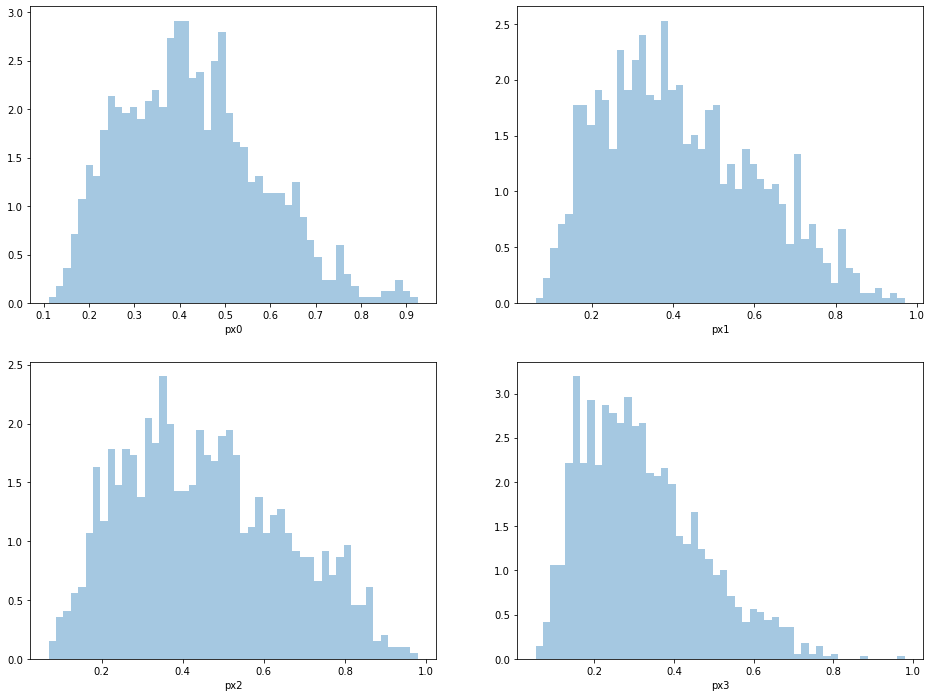

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.distplot(df.loc[pd.notnull(df.px0), 'px0'], bins=50, kde=False, norm_hist=True, ax=axs[0, 0])
sns.distplot(df.loc[pd.notnull(df.px1), 'px1'], bins=50, kde=False, norm_hist=True, ax=axs[0, 1])
sns.distplot(df.loc[pd.notnull(df.px2), 'px2'], bins=50, kde=False, norm_hist=True, ax=axs[1, 0])
sns.distplot(df.loc[pd.notnull(df.px3), 'px3'], bins=50, kde=False, norm_hist=True, ax=axs[1, 1])
plt.show()